In [2]:
import pandas as pd
import numpy as np
import csv

import seaborn as sns

# Qualys 2022 TruRisk Report CVEs

In [3]:
df_qualys2022 = pd.read_csv('../data_in/qualys/qualys_2022_report_cves.csv')
df_qualys2022 = df_qualys2022.rename(columns={"CVE": "cve"})
df_qualys2022

,cve,TITLE,QVS
0,CVE-2021-4034,polkits pkexec Local Privilege Escalation Vuln...,95
1,CVE-2022-0028,Palo Alto Networks PAN-OS Reflected Amplificat...,95
2,CVE-2022-0543,Debian-specific Redis Server Lua Sandbox Escap...,95
3,CVE-2022-0609,Google Chrome Animation Module Use-After-Free ...,95
4,CVE-2022-0824,webmin Improper Access Control to Remote Code ...,75
...,...,...,...
185,CVE-2022-42827,Apple iOS and iPadOS Out-of-Bounds Write Vulne...,95
186,CVE-2022-42856,Apple iOS Type Confusion Vulnerability,95
187,CVE-2022-44698,Microsoft Defender SmartScreen Security Featur...,95
188,CVE-2022-45045,Xiongmai NVR Multiple Devices Arbitrary Comman...,41


In [4]:
df_enriched = pd.read_csv('../data_out/CVSSData_enriched.csv.gz', compression="gzip")
df_enriched

/var/folders/ss/mvst4cws5c9dzhhthv64hhzr0000gq/T/ipykernel_25448/2212371604.py:1: DtypeWarning: Columns (11,13,14,21,23,24,28,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df_enriched = pd.read_csv('../data_out/CVSSData_enriched.csv.gz', compression="gzip")


,cve,Published,Description,AttackVector CVSS3,AttackComplexity CVSS3,PrivilegesRequired CVSS3,UserInteraction CVSS3,Scope CVSS3,ConfidentialityImpact CVSS3,IntegrityImpact CVSS3,...,CWEs,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit,BaseScore
0,CVE-1999-0095,1988-10-01,"The debug command in Sendmail is enabled, allo...",Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.01157,False,False,False,False,5,10.0
1,CVE-1999-0082,1988-11-11,CWD ~root command in ftpd allows root access.,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.11698,False,False,False,False,5,10.0
2,CVE-1999-1471,1989-01-01,Buffer overflow in passwd in BSD based operati...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.00043,False,False,False,False,5,7.2
3,CVE-1999-1122,1989-07-26,Vulnerability in restore in SunOS 4.0.3 and ea...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.00061,False,False,False,False,5,4.6
4,CVE-1999-1467,1989-10-26,Vulnerability in rcp on SunOS 4.0.x allows rem...,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,Missing_Data,...,['NVD-CWE-Other'],False,False,0.00425,False,False,False,False,5,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221756,CVE-2023-7108,False,False,False,False,False,False,False,False,False,...,False,False,False,0.00045,False,False,False,False,5,False
221757,CVE-2023-7109,False,False,False,False,False,False,False,False,False,...,False,False,False,0.00045,False,False,False,False,5,False
221758,CVE-2023-7110,False,False,False,False,False,False,False,False,False,...,False,False,False,0.00045,False,False,False,False,5,False
221759,CVE-2023-7207,False,False,False,False,False,False,False,False,False,...,False,False,False,0.00045,False,False,False,False,5,False


In [5]:
df_qualys2022 = pd.merge(df_qualys2022, df_enriched,  on='cve', how='left').fillna(False)
df_qualys2022

,cve,TITLE,QVS,Published,Description,AttackVector CVSS3,AttackComplexity CVSS3,PrivilegesRequired CVSS3,UserInteraction CVSS3,Scope CVSS3,...,CWEs,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit,BaseScore
0,CVE-2021-4034,polkits pkexec Local Privilege Escalation Vuln...,95,2022-01-28,A local privilege escalation vulnerability was...,LOCAL,LOW,LOW,NONE,UNCHANGED,...,"['CWE-125', 'CWE-787']",True,False,0.00046,False,True,False,False,0.0,7.8
1,CVE-2022-0028,Palo Alto Networks PAN-OS Reflected Amplificat...,95,2022-08-10,A PAN-OS URL filtering policy misconfiguration...,NETWORK,LOW,NONE,NONE,CHANGED,...,['NVD-CWE-Other'],False,False,0.0034,False,True,False,False,0.0,8.6
2,CVE-2022-0543,Debian-specific Redis Server Lua Sandbox Escap...,95,2022-02-18,"It was discovered, that redis, a persistent ke...",NETWORK,LOW,NONE,NONE,CHANGED,...,['CWE-862'],True,True,0.97088,False,True,False,False,0.0,10.0
3,CVE-2022-0609,Google Chrome Animation Module Use-After-Free ...,95,2022-04-05,Use after free in Animation in Google Chrome p...,NETWORK,LOW,NONE,REQUIRED,UNCHANGED,...,['CWE-416'],False,False,0.05681,False,True,False,True,0.0,8.8
4,CVE-2022-0824,webmin Improper Access Control to Remote Code ...,75,2022-03-02,Improper Access Control to Remote Code Executi...,NETWORK,LOW,LOW,NONE,UNCHANGED,...,['CWE-284'],True,True,0.97246,False,False,False,False,1.0,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,CVE-2022-42827,Apple iOS and iPadOS Out-of-Bounds Write Vulne...,95,2022-11-01,An out-of-bounds write issue was addressed wit...,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,...,['CWE-787'],False,False,0.00081,False,True,False,True,0.0,7.8
186,CVE-2022-42856,Apple iOS Type Confusion Vulnerability,95,2022-12-15,A type confusion issue was addressed with impr...,NETWORK,LOW,NONE,REQUIRED,UNCHANGED,...,['CWE-843'],False,False,0.00223,False,True,False,True,0.0,8.8
187,CVE-2022-44698,Microsoft Defender SmartScreen Security Featur...,95,2022-12-13,Windows SmartScreen Security Feature Bypass Vu...,NETWORK,LOW,NONE,REQUIRED,UNCHANGED,...,['CWE-755'],False,False,0.01311,False,True,False,False,0.0,5.4
188,CVE-2022-45045,Xiongmai NVR Multiple Devices Arbitrary Comman...,41,2022-12-01,"Multiple Xiongmai NVR devices, including MBD63...",NETWORK,LOW,LOW,NONE,UNCHANGED,...,['CWE-78'],False,False,0.00135,False,False,False,False,5.0,8.8


In [6]:
df_qualys2022.to_csv('../data_out/qualys/qualys.csv.gz', index=False, quoting=csv.QUOTE_NONNUMERIC, escapechar='\\', compression='gzip')


In [7]:
# QVS score > 90 and not CISA KEV or Metasploit or Nuclei
df_qualys_90 = df_qualys2022[df_qualys2022["QVS"] >=90]
df_qualys_90 = df_qualys_90[df_qualys_90["exploit"] > 3] 
df_qualys_90

,cve,TITLE,QVS,Published,Description,AttackVector CVSS3,AttackComplexity CVSS3,PrivilegesRequired CVSS3,UserInteraction CVSS3,Scope CVSS3,...,CWEs,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit,BaseScore
73,CVE-2022-23812,node-ipc Malicious peacenotwar Package Import ...,95,2022-03-16,This affects the package node-ipc from 10.1.1 ...,NETWORK,LOW,NONE,NONE,UNCHANGED,...,['NVD-CWE-Other'],False,False,0.00584,False,False,False,False,5.0,9.8
82,CVE-2022-24934,Kingsoft WPS Office wpsupdater.exe Remote Code...,95,2022-03-23,wpsupdater.exe in Kingsoft WPS Office through ...,NETWORK,LOW,NONE,NONE,UNCHANGED,...,['NVD-CWE-noinfo'],False,False,0.00883,False,False,False,False,5.0,9.8
105,CVE-2022-26504,Veeam Backup & Replication Improper Authentica...,95,2022-03-17,Improper authentication in Veeam Backup & Repl...,NETWORK,LOW,LOW,NONE,UNCHANGED,...,['CWE-287'],False,False,0.00112,False,False,False,False,5.0,8.8
125,CVE-2022-30170,Windows Credential Roaming Service Elevation o...,95,2022-09-13,Windows Credential Roaming Service Elevation o...,LOCAL,LOW,LOW,REQUIRED,UNCHANGED,...,['NVD-CWE-noinfo'],False,False,0.00044,False,False,False,False,5.0,7.3
134,CVE-2022-31460,Meeting Owl Pro and Whiteboard Owl Hard-Coded ...,95,2022-06-02,Owl Labs Meeting Owl 5.2.0.15 allows attackers...,ADJACENT_NETWORK,LOW,NONE,NONE,CHANGED,...,['CWE-798'],False,False,0.00062,False,False,False,False,5.0,7.4
146,CVE-2022-34151,OMRON Corporation Multiple Products Credential...,95,2022-07-04,Use of hard-coded credentials vulnerability ex...,NETWORK,HIGH,NONE,NONE,UNCHANGED,...,['CWE-798'],False,False,0.0054,False,False,False,False,5.0,8.1
149,CVE-2022-34721,Windows Internet Key Exchange (IKE) Protocol E...,95,2022-09-13,Windows Internet Key Exchange (IKE) Protocol E...,NETWORK,LOW,NONE,NONE,UNCHANGED,...,['NVD-CWE-noinfo'],False,False,0.01059,False,False,False,False,5.0,9.8
189,CVE-2022-45359,YITH WooCommerce Gift Cards Premium Plugin Arb...,95,2022-12-06,Unauth. Arbitrary File Upload vulnerability in...,NETWORK,LOW,NONE,NONE,UNCHANGED,...,['CWE-434'],False,False,0.0017,False,False,False,False,5.0,9.8


In [8]:
df_qualys_90.columns

Index(['cve', 'TITLE', 'QVS', 'Published', 'Description', 'AttackVector CVSS3',
       'AttackComplexity CVSS3', 'PrivilegesRequired CVSS3',
       'UserInteraction CVSS3', 'Scope CVSS3', 'ConfidentialityImpact CVSS3',
       'IntegrityImpact CVSS3', 'AvailabilityImpact CVSS3', 'BaseScore CVSS3',
       'BaseSeverity CVSS3', 'ExploitabilityScore CVSS3', 'ImpactScore CVSS3',
       'AccessVector CVSS2', 'AccessComplexity CVSS2', 'Authentication CVSS2',
       'ConfidentialityImpact CVSS2', 'IntegrityImpact CVSS2',
       'AvailabilityImpact CVSS2', 'BaseScore CVSS2', 'BaseSeverity CVSS2',
       'ExploitabilityScore CVSS2', 'ImpactScore CVSS2', 'CWEs', 'metasploit',
       'nuclei', 'epss', 'exploitdb', 'cisa_kev', 'msrc', 'gpz', 'exploit',
       'BaseScore'],
      dtype='object')

/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  func(

Text(0.5, 0.98, 'Qualys 2022 CVE report with QVS scores vs EPSS')

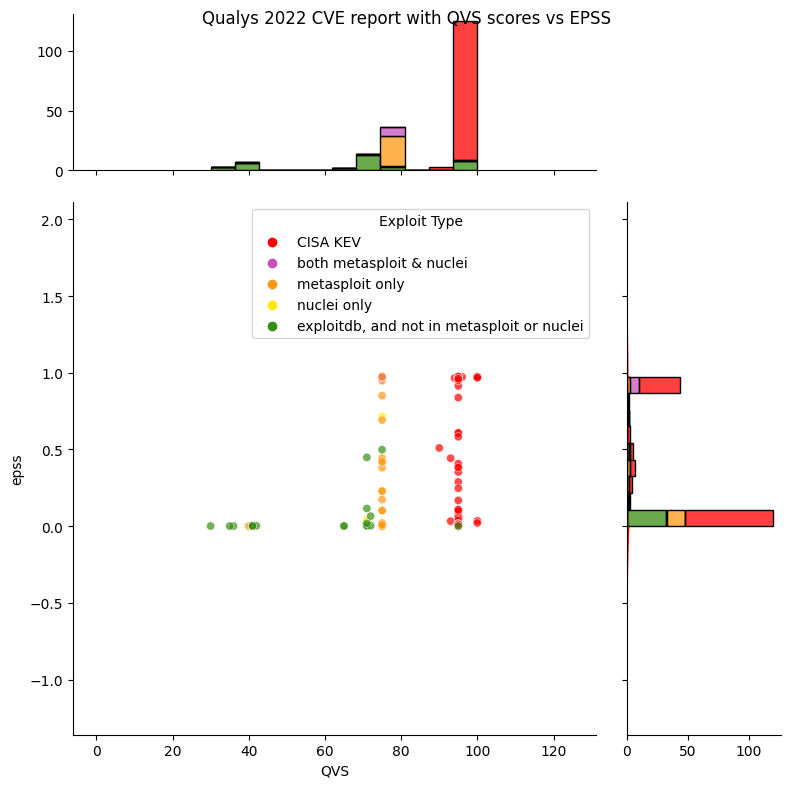

In [9]:
palette1 = ["#ff0000", "#C750BD", "#FF9913", "#FFE900", "#398e14", "#0000FF"]

g=sns.jointplot(data=df_qualys2022, x='QVS', y='epss', kind='scatter', height=8, ratio=3, marginal_ticks=True, alpha=.7, hue="exploit", palette=palette1)
handles, labels = g.ax_joint.get_legend_handles_labels()
g.ax_joint.legend(handles=handles, labels = ['CISA KEV', 'both metasploit & nuclei', 'metasploit only', 'nuclei only', 'exploitdb, and not in metasploit or nuclei', 'other'], title="Exploit Type")
g.plot_marginals(sns.histplot, multiple="stack")
g.fig.suptitle("Qualys 2022 CVE report with QVS scores vs EPSS")

/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)
/Users/cmadden01/work/vulnerability_scoring/vulnerability_scoring3/lib/python3.11/site-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  func(

Text(0.5, 0.98, 'Qualys 2022 CVE report with QVS scores vs CVSS Base Score')

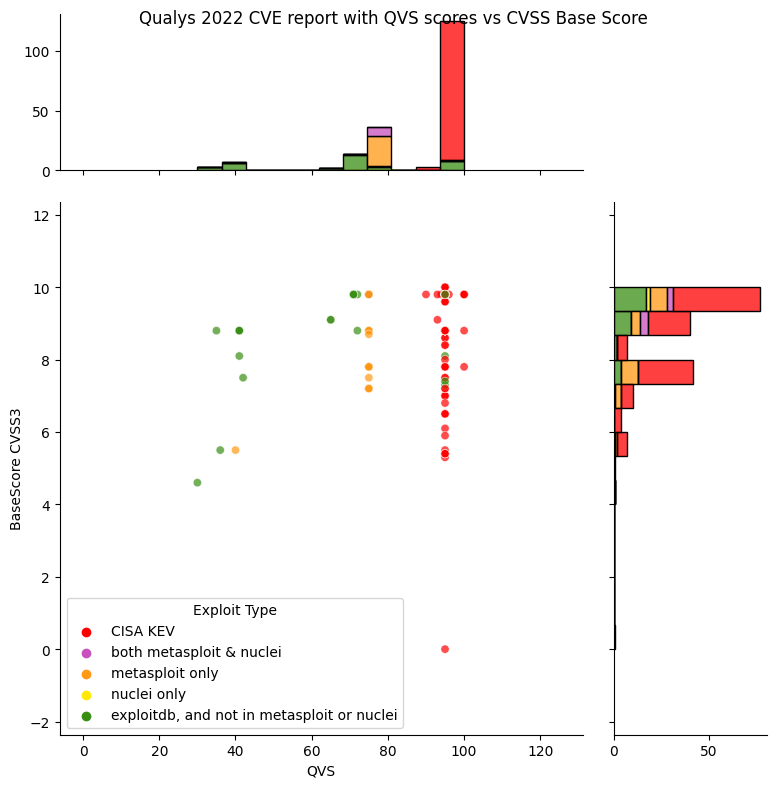

In [10]:
import matplotlib.pyplot as plt

palette1 = ["#ff0000", "#C750BD", "#FF9913", "#FFE900", "#398e14", "#0000FF"]

g=sns.jointplot(data=df_qualys2022, x='QVS', y='BaseScore CVSS3', kind='scatter', height=8, ratio=3, marginal_ticks=True, alpha=.7, hue="exploit", palette=palette1)
handles, labels = g.ax_joint.get_legend_handles_labels()
g.ax_joint.legend(handles=handles, labels = ['CISA KEV', 'both metasploit & nuclei', 'metasploit only', 'nuclei only', 'exploitdb, and not in metasploit or nuclei', 'other'], title="Exploit Type")
g.plot_marginals(sns.histplot, multiple="stack")
g.fig.suptitle("Qualys 2022 CVE report with QVS scores vs CVSS Base Score")

# Spearman Correlation Coefficient


### QVS vs CVSS vs EPSS with Plots

In [11]:
df = df_qualys2022[["QVS", "epss", "BaseScore"]]
df['epss'] = df['epss'].astype(float)
df['BaseScore'] = df['BaseScore'].astype(float)
df

/var/folders/ss/mvst4cws5c9dzhhthv64hhzr0000gq/T/ipykernel_25448/155077991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['epss'] = df['epss'].astype(float)
/var/folders/ss/mvst4cws5c9dzhhthv64hhzr0000gq/T/ipykernel_25448/155077991.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BaseScore'] = df['BaseScore'].astype(float)


,QVS,epss,BaseScore
0,95,0.00046,7.8
1,95,0.00340,8.6
2,95,0.97088,10.0
3,95,0.05681,8.8
4,75,0.97246,8.8
...,...,...,...
185,95,0.00081,7.8
186,95,0.00223,8.8
187,95,0.01311,5.4
188,41,0.00135,8.8


In [12]:
#code and explanation from https://stackabuse.com/calculating-spearmans-rank-correlation-coefficient-in-python-with-pandas/
def display_correlation(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

In [13]:
def display_corr_pairs(df,color="cyan"):
    s = set_title = np.vectorize(lambda ax,r,rho: ax.title.set_text("r = " + 
                                        "{:.2f}".format(r) + 
                                        '\n $\\rho$ = ' + 
                                        "{:.2f}".format(rho)) if ax!=None else None)      
    r = display_correlation(df)
    rho = df.corr(method="pearson")
    g = sns.PairGrid(df,corner=True)
    g.map_diag(plt.hist,color="yellow")
    g.map_lower(sns.scatterplot,color="magenta")
    set_title(g.axes,r,rho)
    plt.subplots_adjust(hspace = 0.6)
    plt.show()    

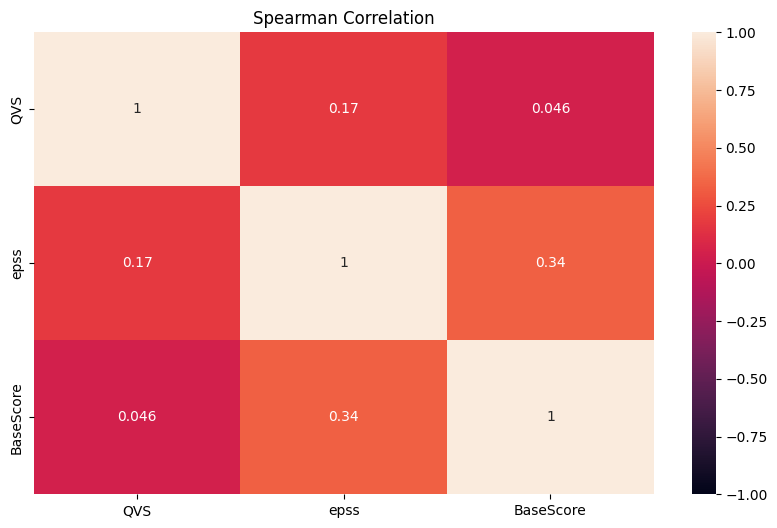

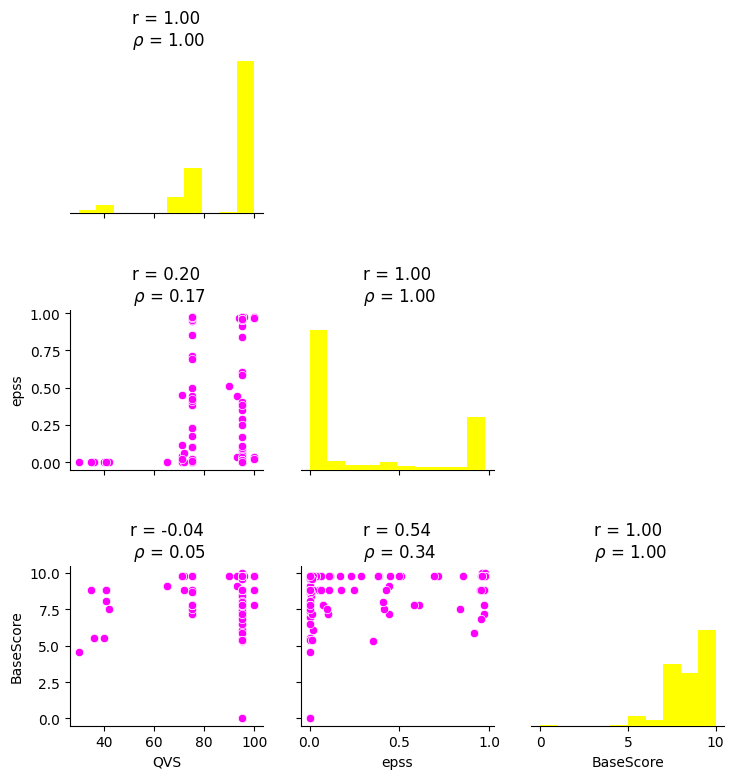

In [14]:
display_corr_pairs(df)
